In [576]:
import pandas as pd
from sqlalchemy import create_engine

# Extract CSVs into DataFrames

### Netflix
* Import Netflix csv to df

In [577]:
# import the csv to df
netflix_data = pd.read_csv("./Resources/netflix_titles.csv")
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [578]:
# Check the df info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [579]:
# Check the column names
netflix_data.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Amazon Prime
* Import Amazon csv to df

In [580]:
# import the csv to df
amazon_data = pd.read_csv("./Resources/amazon_prime_titles.csv")
amazon_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [581]:
# Check the df info
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [582]:
# Check the column names
amazon_data.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Transform DataFrame

### Netflix
* Clean Netflix df

In [583]:
# Rename listed_in to category
netflix_data1 = netflix_data.rename(columns = {'listed_in': 'category'})
netflix_data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [639]:
# Removing the unwanted columns
columns = ["show_id","title", "director", "country", "release_year", "rating", "category"]
netflix_data2 = netflix_data1[columns]
netflix_data2

,show_id,title,director,country,release_year,rating,category
0,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,Julien Leclercq,NaN,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,"Docuseries, Reality TV"
4,s5,Kota Factory,NaN,India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8802,s8803,Zodiac,David Fincher,United States,2007,R,"Cult Movies, Dramas, Thrillers"
8803,s8804,Zombie Dumb,NaN,NaN,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Zombieland,Ruben Fleischer,United States,2009,R,"Comedies, Horror Movies"
8805,s8806,Zoom,Peter Hewitt,United States,2006,PG,"Children & Family Movies, Comedies"


In [640]:
# Check category values
netflix_data2.category

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: category, Length: 8807, dtype: object

In [641]:
#Converting string into a list of strings
netflix_data2['category'] = netflix_data2['category'].str.split(',')
netflix_data2

/var/folders/s2/bz8ncph158qd5mt0ypmk1v4w0000gn/T/ipykernel_97617/3225236072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data2['category'] = netflix_data2['category'].str.split(',')


,show_id,title,director,country,release_year,rating,category
0,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,[Documentaries]
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,"[International TV Shows, TV Dramas, TV Myste..."
2,s3,Ganglands,Julien Leclercq,NaN,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV ..."
3,s4,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,"[Docuseries, Reality TV]"
4,s5,Kota Factory,NaN,India,2021,TV-MA,"[International TV Shows, Romantic TV Shows, ..."
...,...,...,...,...,...,...,...
8802,s8803,Zodiac,David Fincher,United States,2007,R,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,Zombie Dumb,NaN,NaN,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Zombieland,Ruben Fleischer,United States,2009,R,"[Comedies, Horror Movies]"
8805,s8806,Zoom,Peter Hewitt,United States,2006,PG,"[Children & Family Movies, Comedies]"


In [642]:
# explode rows into multiples rows
netflix_data2 = netflix_data2.explode('category')
netflix_data2

,show_id,title,director,country,release_year,rating,category
0,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,International TV Shows
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,TV Dramas
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,TV Mysteries
2,s3,Ganglands,Julien Leclercq,NaN,2021,TV-MA,Crime TV Shows
...,...,...,...,...,...,...,...
8805,s8806,Zoom,Peter Hewitt,United States,2006,PG,Children & Family Movies
8805,s8806,Zoom,Peter Hewitt,United States,2006,PG,Comedies
8806,s8807,Zubaan,Mozez Singh,India,2015,TV-14,Dramas
8806,s8807,Zubaan,Mozez Singh,India,2015,TV-14,International Movies


In [643]:
netflix_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   title         19323 non-null  object
 2   director      13439 non-null  object
 3   country       17601 non-null  object
 4   release_year  19323 non-null  int64 
 5   rating        19317 non-null  object
 6   category      19323 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


### Amazon
* Clean Amazon df

In [589]:
### Rename listed_in to category
amazon_data1 = amazon_data.rename(columns = {'listed_in': 'category'})
amazon_data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [660]:
columns = ["show_id", "title", "director", "country", "release_year", "rating", "category"]
amazon_data2 = amazon_data1[columns]
amazon_data2

,show_id,title,director,country,release_year,rating,category
0,s1,The Grand Seduction,Don McKellar,Canada,2014,NaN,"Comedy, Drama"
1,s2,Take Care Good Night,Girish Joshi,India,2018,13+,"Drama, International"
2,s3,Secrets of Deception,Josh Webber,United States,2017,NaN,"Action, Drama, Suspense"
3,s4,Pink: Staying True,Sonia Anderson,United States,2014,NaN,Documentary
4,s5,Monster Maker,Giles Foster,United Kingdom,1989,NaN,"Drama, Fantasy"
...,...,...,...,...,...,...,...
9663,s9664,Pride Of The Bowery,Joseph H. Lewis,NaN,1940,7+,Comedy
9664,s9665,Planet Patrol,NaN,NaN,2018,13+,TV Shows
9665,s9666,Outpost,Steve Barker,NaN,2008,R,Action
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,"Drama, Sports"


In [661]:
#Converting string into a list of strings
amazon_data2['category'] = amazon_data2['category'].str.split(',')
amazon_data2

/var/folders/s2/bz8ncph158qd5mt0ypmk1v4w0000gn/T/ipykernel_97617/1225802920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data2['category'] = amazon_data2['category'].str.split(',')


,show_id,title,director,country,release_year,rating,category
0,s1,The Grand Seduction,Don McKellar,Canada,2014,NaN,"[Comedy, Drama]"
1,s2,Take Care Good Night,Girish Joshi,India,2018,13+,"[Drama, International]"
2,s3,Secrets of Deception,Josh Webber,United States,2017,NaN,"[Action, Drama, Suspense]"
3,s4,Pink: Staying True,Sonia Anderson,United States,2014,NaN,[Documentary]
4,s5,Monster Maker,Giles Foster,United Kingdom,1989,NaN,"[Drama, Fantasy]"
...,...,...,...,...,...,...,...
9663,s9664,Pride Of The Bowery,Joseph H. Lewis,NaN,1940,7+,[Comedy]
9664,s9665,Planet Patrol,NaN,NaN,2018,13+,[TV Shows]
9665,s9666,Outpost,Steve Barker,NaN,2008,R,[Action]
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,"[Drama, Sports]"


In [662]:
##explode rows into multiples rows
amazon_data2 = amazon_data2.explode('category')
amazon_data2

,show_id,title,director,country,release_year,rating,category
0,s1,The Grand Seduction,Don McKellar,Canada,2014,NaN,Comedy
0,s1,The Grand Seduction,Don McKellar,Canada,2014,NaN,Drama
1,s2,Take Care Good Night,Girish Joshi,India,2018,13+,Drama
1,s2,Take Care Good Night,Girish Joshi,India,2018,13+,International
2,s3,Secrets of Deception,Josh Webber,United States,2017,NaN,Action
...,...,...,...,...,...,...,...
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,Drama
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,Sports
9667,s9668,Harry Brown,Daniel Barber,NaN,2010,R,Action
9667,s9668,Harry Brown,Daniel Barber,NaN,2010,R,Drama


In [663]:
amazon_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18309 entries, 0 to 9667
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       18309 non-null  object
 1   title         18309 non-null  object
 2   director      14681 non-null  object
 3   country       1378 non-null   object
 4   release_year  18309 non-null  int64 
 5   rating        17559 non-null  object
 6   category      18309 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


# Load DataFrames into database

### Create database connection

In [594]:
from config import username, password

protocol = 'postgresql'
# username = ''
# password = ''
host = 'localhost'
port = 5432
database_name = 'Project2-db'

connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'

engine = create_engine(connection_string)

In [595]:
engine.table_names()

/var/folders/s2/bz8ncph158qd5mt0ypmk1v4w0000gn/T/ipykernel_97617/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['amazon', 'netflix']

In [596]:
netflix_data2.to_sql(name = "netflix", con = engine, if_exists = "append", index = False)

323

In [597]:
amazon_data2.to_sql(name = "amazon", con = engine, if_exists = "append", index = False)

309

In [598]:
pd.read_sql_query("Select * from netflix", con = engine)

,id,show_id,title,director,country,release_year,rating,category
0,1,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries
1,2,s2,Blood & Water,None,South Africa,2021,TV-MA,International TV Shows
2,3,s2,Blood & Water,None,South Africa,2021,TV-MA,TV Dramas
3,4,s2,Blood & Water,None,South Africa,2021,TV-MA,TV Mysteries
4,5,s3,Ganglands,Julien Leclercq,None,2021,TV-MA,Crime TV Shows
...,...,...,...,...,...,...,...,...
96610,96611,s8806,Zoom,Peter Hewitt,United States,2006,PG,Children & Family Movies
96611,96612,s8806,Zoom,Peter Hewitt,United States,2006,PG,Comedies
96612,96613,s8807,Zubaan,Mozez Singh,India,2015,TV-14,Dramas
96613,96614,s8807,Zubaan,Mozez Singh,India,2015,TV-14,International Movies


In [599]:
pd.read_sql_query("Select * from amazon", con = engine)

,id,show_id,title,director,country,release_year,rating,category
0,1,s1,The Grand Seduction,Don McKellar,Canada,2014,None,Comedy
1,2,s1,The Grand Seduction,Don McKellar,Canada,2014,None,Drama
2,3,s2,Take Care Good Night,Girish Joshi,India,2018,13+,Drama
3,4,s2,Take Care Good Night,Girish Joshi,India,2018,13+,International
4,5,s3,Secrets of Deception,Josh Webber,United States,2017,None,Action
...,...,...,...,...,...,...,...,...
91540,91541,s9667,Maradona: Blessed Dream,None,None,2021,TV-MA,Drama
91541,91542,s9667,Maradona: Blessed Dream,None,None,2021,TV-MA,Sports
91542,91543,s9668,Harry Brown,Daniel Barber,None,2010,R,Action
91543,91544,s9668,Harry Brown,Daniel Barber,None,2010,R,Drama


## Queries

In [600]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np

### 1. compare the number of released titles each year

In [601]:
# Netflix titles per year
n_yearlyrelease_df = pd.DataFrame(netflix_data['release_year'].value_counts()).reset_index()
n_yearlyrelease_df = n_yearlyrelease_df.rename(
    columns = {
        'index': 'Year',
        'release_year': 'Title Count'
    }).sort_values(by = 'Year', ascending = False)
n_yearlyrelease_df.head(10)

,Year,Title Count
5,2021,592
3,2020,953
2,2019,1030
0,2018,1147
1,2017,1032
4,2016,902
6,2015,560
7,2014,352
8,2013,288
9,2012,237


In [602]:
# Amazon titles per year
a_yearlyrelease_df = pd.DataFrame(amazon_data['release_year'].value_counts()).reset_index()
a_yearlyrelease_df = a_yearlyrelease_df.rename(
    columns = {
        'index': 'Year',
        'release_year': 'Title Count'
    }).sort_values(
        by = 'Year', 
        ascending = False)
a_yearlyrelease_df.head(10)

,Year,Title Count
0,2021,1442
1,2020,962
2,2019,929
3,2018,623
4,2017,562
5,2016,521
7,2015,378
6,2014,391
8,2013,289
10,2012,252


In [603]:
# Combine the title count dfs to compare
yearlyrelease_df = pd.merge(n_yearlyrelease_df, a_yearlyrelease_df, on = 'Year', how = 'outer')
yearlyrelease_df.rename(
    columns = {
        'Title Count_x': 'Netflix Title Count',
        'Title Count_y': 'Amazon Title Count'
    }, inplace = True)
yearlyrelease_df.dropna(inplace = True)
yearlyrelease_df = yearlyrelease_df.astype({'Netflix Title Count': 'int64'}).set_index('Year')
yearlyrelease_df

,Netflix Title Count,Amazon Title Count
Year,,
2021,592,1442
2020,953,962
2019,1030,929
2018,1147,623
2017,1032,562
...,...,...
1945,4,14
1944,3,12
1943,3,21


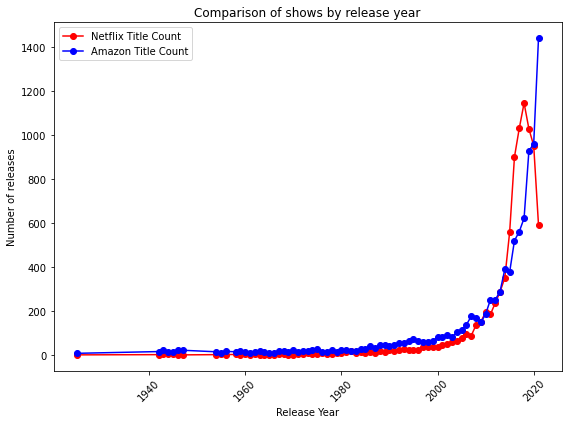

This graph shows that Amazon has been releasing older shows than Netflix


In [604]:
yearlyrelease_df.plot(
    kind = 'line',
    figsize = (8,6),
    color = ('red', 'blue'),
    marker = 'o',
    title = 'Comparison of shows by release year'
    )

plt.xticks(
    rotation = 45
)

plt.xlabel("Release Year")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

# plt.savefig('./Images/Release_year.png', format = 'png')

print('This graph shows that Amazon has been releasing older shows than Netflix')

### 2. compare the number of released categories each year

In [605]:
# Netflix catgeories per year
ncat_df = pd.DataFrame(netflix_data2['category'].value_counts()).reset_index()
ncat_df = ncat_df.rename(
    columns = {
        'index': 'Category',
        'category': 'Category Count'
    }).sort_values(by = 'Category Count', ascending = False)
ncat_df.head()


,Category,Category Count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829


In [606]:
# Amazon catgeories per year
acat_df = pd.DataFrame(amazon_data2['category'].value_counts()).reset_index()
acat_df = acat_df.rename(
    columns = {
        'index': 'Category',
        'category': 'Category Count'
    }).sort_values(by = 'Category Count', ascending = False)
acat_df.head()


,Category,Category Count
0,Drama,2216
1,Action,1657
2,Comedy,1475
3,Drama,1471
4,Suspense,1307


In [607]:
cat_df = pd.merge(ncat_df, acat_df, on = 'Category', how = 'outer').fillna(0)
cat_df = cat_df.rename(
    columns = {
        'Category Count_x': 'Netflix Count',
        'Category Count_y': 'Amazon Count'
    }).sort_values(
        by = 'Category', 
        ascending = True
        ).astype({
    'Netflix Count': 'int64',
    'Amazon Count': 'int64'
    })#.set_index('Category')
cat_df

,Category,Netflix Count,Amazon Count
93,Adventure,0,188
111,Animation,0,49
115,Anime,0,36
50,Anime Features,50,0
124,Arthouse,0,9
...,...,...,...
127,Talk Show and Variety,0,3
43,Thrillers,65,0
116,Unscripted,0,29
101,Western,0,102


In [608]:
# Check category names
# cat_df.index
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cat_df['Category'].unique)

<bound method Series.unique of 93                         Adventure
111                        Animation
115                            Anime
50                    Anime Features
124                         Arthouse
118                             Arts
54          Children & Family Movies
67                 Classic & Cult TV
53                    Classic Movies
13                          Comedies
81                            Comedy
40                    Crime TV Shows
47                       Cult Movies
51                     Documentaries
106                      Documentary
26                        Docuseries
76                             Drama
5                             Dramas
85                     Entertainment
44              Faith & Spirituality
108           Faith and Spirituality
110                          Fantasy
117                       Historical
90                            Horror
38                     Horror Movies
7                 Independent Movies
91     

In [609]:
cat_df['Category'].value_counts()

 Adventure                    1
Action                        1
International Movies          1
International                 1
Independent Movies            1
                             ..
 Romance                      1
 Reality TV                   1
 Music Videos and Concerts    1
 Music & Musicals             1
Young Adult Audience          1
Name: Category, Length: 129, dtype: int64

In [610]:
# Combining similar categories together
cat_df['Category'] = cat_df['Category'].apply(lambda x: x.strip())
cat_df['Category'] = cat_df['Category'].replace({
    "Action": "Action & Adventure",
    "Adventure": "Action & Adventure",
    "Western": "Action & Adventure",
    "TV Action & Adventure": "Action & Adventure",
    "Anime": "Animation",
    "Anime Features": "Animation",
    "Anime Series": "Animation",
    "Art & History": "Culture & History",
    "Arts": "Culture & History",
    "Arthouse": "Culture & History",
    "Historical": "Culture & History",
    "Military and War": "Culture & History",
    "Music Videos and Concerts": "Music & Musicals",
    "International Movies": "International",
    "International TV Shows": "International",
    "Spanish-Language TV Shows": "International",
    "Korean TV Shows": "International",
    "Independent Movies": "Independent",
    "Horror Movies": "Horror",
    "TV Horror": "Horror",
    "Dramas": "Drama",
    "TV Dramas": "Drama",
    "Documentaries": "Documentary",
    "Docuseries": "Documentary",
    "Science & Nature TV": "Documentary",
    "Comedies": "Comedy",
    "TV Comedies": "Comedy",
    "Crime TV Shows": "Crime & Mystery",
    "TV Mysteries": "Crime & Mystery",
    "Stand-Up Comedy & Talk Shows": "Comedy",
    "Stand-Up Comedy": "Comedy",
    "Classic & Culture": "Culture & History",
    "Classic & Cult TV": "Culture & History",
    "Faith & Spirituality": "Culture & History",
    "Cult Movies": "Culture & History",
    "Classic Movies": "Culture & History",
    "Faith and Spirituality": "Culture & History",
    "and Culture": "Culture & History",
    "Children & Family Movies": "Children & Family",
    "Kids": "Children & Family",
    "Kids' TV": "Children & Family",
    "Fantasy": "Sci-Fi & Fantasy",
    "TV Sci-Fi & Fantasy": "Sci-Fi & Fantasy",
    "Science Fiction": "Sci-Fi & Fantasy",
    "LGBTQ Movies": "LGBTQ",
    "Entertainment": "Reality TV",
    "Romantic TV Shows": "Romance",
    "Romantic Movies": "Romance",
    "Suspense": "Thriller",
    "TV Thrillers": "Thriller",
    "Thrillers": "Thriller",
    "Teen TV Shows": "Young Adult Audience",
    "Sports Movies": "Sport",
    "Fitness": "Sport",
    "Sports": "Sport",
    "British TV Shows": "Talk Show & Variety",
    "Talk Show and Variety": "Talk Show & Variety",
    "TV Shows": "Talk Show & Variety"
    })
cat_df

,Category,Netflix Count,Amazon Count
93,Action & Adventure,0,188
111,Animation,0,49
115,Animation,0,36
50,Animation,50,0
124,Culture & History,0,9
...,...,...,...
127,Talk Show & Variety,0,3
43,Thriller,65,0
116,Unscripted,0,29
101,Action & Adventure,0,102


In [611]:
cat_df = cat_df.groupby(['Category']).sum()
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Action & Adventure to Young Adult Audience
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Netflix Count  23 non-null     int64
 1   Amazon Count   23 non-null     int64
dtypes: int64(2)
memory usage: 552.0+ bytes


In [612]:
# Show only counts over 1000 in either platforms
cat_df1 = cat_df.loc[
    (cat_df["Netflix Count"] > 1000) | (cat_df["Amazon Count"] > 1000), :]
cat_df1

,Netflix Count,Amazon Count
Category,,
Action & Adventure,1027,2150
Children & Family,1092,1085
Comedy,2654,2099
Culture & History,280,1248
Documentary,1356,993
Drama,3190,3687
International,4428,355
Thriller,634,1501


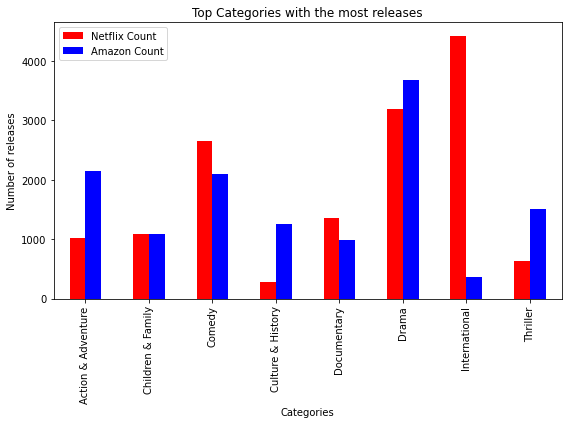

In [613]:
cat_df1.plot(
    kind = "bar", 
    color = ('red', 'blue'),
    title = "Top Categories with the most releases",
    figsize = (8, 6)
)

plt.xticks(rotation = 90)

plt.xlabel("Categories")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

# plt.savefig('./Images/categories.png', format = 'png')

### 3. compare the most active directors

In [614]:
# Netflix directors
n_directors = pd.DataFrame(netflix_data["director"].value_counts()).reset_index()
n_directors.rename(
    columns = {
        'index': 'Director',
        'director': 'Count'
    }, inplace = True)
n_directors = n_directors.loc[n_directors["Count"] > 10, :]
n_directors = n_directors.head(10)
n_directors

,Director,Count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


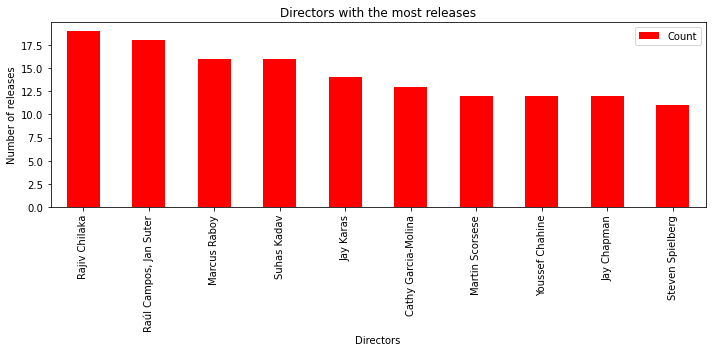

In [615]:
n_directors.plot(
    kind = "bar", 
    color = "red",
    title = "Directors with the most releases",
    figsize = (10, 5)
)

nxtick = n_directors['Director'].tolist()
plt.xticks(
    rotation = 90,
    ticks = np.arange(len(nxtick)),
    labels = nxtick
    )

plt.xlabel("Directors")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

# plt.savefig('./Images/netflix_directors.png', format = 'png')

In [616]:
# Amazon directors

a_directors = pd.DataFrame(amazon_data["director"].value_counts()).reset_index()
a_directors.rename(
    columns = {
        'index': 'Director',
        'director': 'Count'
    }, inplace = True)
a_directors = a_directors.loc[a_directors["Count"] > 10, :]
a_directors

,Director,Count
0,Mark Knight,113
1,Cannis Holder,61
2,Moonbug Entertainment,37
3,Jay Chapman,34
4,Arthur van Merwijk,30
5,Manny Rodriguez,22
6,John English,20
7,1,16
8,Brian Volk-Weiss,15
9,Baeble Music,14


In [617]:

# Drop the director name "1"
a_directors = a_directors.drop(a_directors.index[a_directors['Director'] == '1'])
a_directors = a_directors.head(10)
a_directors

,Director,Count
0,Mark Knight,113
1,Cannis Holder,61
2,Moonbug Entertainment,37
3,Jay Chapman,34
4,Arthur van Merwijk,30
5,Manny Rodriguez,22
6,John English,20
8,Brian Volk-Weiss,15
9,Baeble Music,14
10,Joseph Kane,13


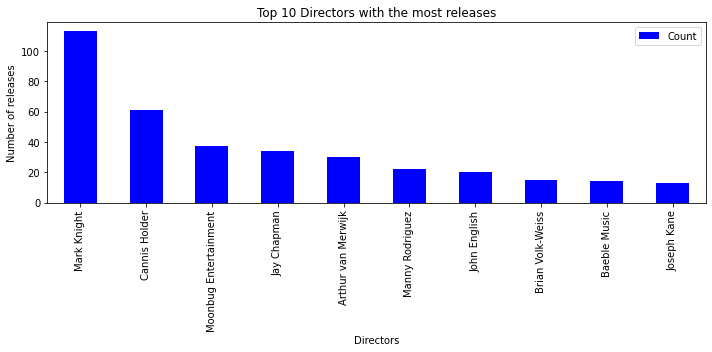

In [618]:
a_directors.plot(
    kind = "bar", 
    color = "blue",
    title = "Top 10 Directors with the most releases",
    figsize = (10, 5)
)

axtick = a_directors['Director'].tolist()
plt.xticks(
    rotation = 90,
    ticks = np.arange(len(axtick)),
    labels = axtick
    )

plt.xlabel("Directors")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

# plt.savefig('./Images/amazon_directors.png', format = 'png')

In [619]:
# Top Director releases across both Netflix and Amazon
dir_df = pd.merge(
    n_directors, 
    a_directors, 
    on = 'Director', 
    how = 'outer'
    ).fillna(0)
#.sort_values(by = 'Count', ascending = False)

dir_df.rename(
    columns = {
        'Count_x': 'Netflix Count',
        'Count_y': 'Amazon Count'
    }, inplace = True)

dir_df.info()

dir_df = dir_df.astype({
    'Netflix Count': 'int64',
    'Amazon Count': 'int64'
    }).set_index('Director')

dir_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Director       19 non-null     object 
 1   Netflix Count  19 non-null     float64
 2   Amazon Count   19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Rajiv Chilaka to Joseph Kane
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Netflix Count  19 non-null     int64
 1   Amazon Count   19 non-null     int64
dtypes: int64(2)
memory usage: 456.0+ bytes


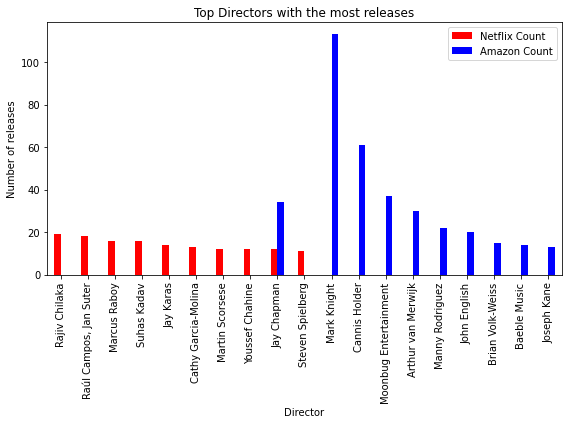

In [620]:
dir_df.plot(
    kind = "bar", 
    color = ('red', 'blue'),
    title = "Top Directors with the most releases",
    figsize = (8, 6)
)

plt.xticks(rotation = 90)

plt.xlabel("Director")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

# plt.savefig('./Images/directors.png', format = 'png')

### 4. compare the number country releases per year

In [644]:
# Netflix country releases per year

# Converting string into a list of strings
netflix_data2['country'] = netflix_data2['country'].str.split(',')
netflix_data2

,show_id,title,director,country,release_year,rating,category
0,s1,Dick Johnson Is Dead,Kirsten Johnson,[United States],2020,PG-13,Documentaries
1,s2,Blood & Water,NaN,[South Africa],2021,TV-MA,International TV Shows
1,s2,Blood & Water,NaN,[South Africa],2021,TV-MA,TV Dramas
1,s2,Blood & Water,NaN,[South Africa],2021,TV-MA,TV Mysteries
2,s3,Ganglands,Julien Leclercq,NaN,2021,TV-MA,Crime TV Shows
...,...,...,...,...,...,...,...
8805,s8806,Zoom,Peter Hewitt,[United States],2006,PG,Children & Family Movies
8805,s8806,Zoom,Peter Hewitt,[United States],2006,PG,Comedies
8806,s8807,Zubaan,Mozez Singh,[India],2015,TV-14,Dramas
8806,s8807,Zubaan,Mozez Singh,[India],2015,TV-14,International Movies


In [646]:
# explode rows into multiples rows
netflix_data3 = netflix_data2.explode('country')
netflix_data3

,show_id,title,director,country,release_year,rating,category
0,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,International TV Shows
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,TV Dramas
1,s2,Blood & Water,NaN,South Africa,2021,TV-MA,TV Mysteries
2,s3,Ganglands,Julien Leclercq,NaN,2021,TV-MA,Crime TV Shows
...,...,...,...,...,...,...,...
8805,s8806,Zoom,Peter Hewitt,United States,2006,PG,Children & Family Movies
8805,s8806,Zoom,Peter Hewitt,United States,2006,PG,Comedies
8806,s8807,Zubaan,Mozez Singh,India,2015,TV-14,Dramas
8806,s8807,Zubaan,Mozez Singh,India,2015,TV-14,International Movies


In [861]:
# Create a shrunken df and rename columns
ncountry_df = pd.DataFrame(netflix_data3["country"].value_counts()).reset_index()
ncountry_df = ncountry_df.rename(
    columns = {
        'index': 'Country',
        'country': 'Country Count'
    })#.set_index('Country')
ncountry_df.info()
ncountry_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        197 non-null    object
 1   Country Count  197 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


,Country,Country Count
0,United States,5755
1,India,2721
2,United Kingdom,1413
3,United States,1025
4,Japan,619
...,...,...
192,Ecuador,1
193,Somalia,1
194,Sudan,1
195,Nicaragua,1


In [864]:
# Show list of unique country column items
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ncountry_df['Country'].unique())

['United States' 'India' 'United Kingdom' 'Japan' 'South Korea' 'Canada'
 'France' 'Spain' 'Mexico' 'Turkey' 'Egypt' 'Germany' 'China' 'Australia'
 'Nigeria' 'Taiwan' 'Indonesia' 'Philippines' 'Brazil' 'Hong Kong'
 'Argentina' 'Thailand' 'Belgium' 'Italy' 'South Africa' 'Colombia'
 ' Australia' 'Poland' 'Singapore' 'Denmark' 'Netherlands' 'Lebanon'
 'Pakistan' 'Israel' 'United Arab Emirates' 'Norway' 'Ireland' 'Malaysia'
 'Chile' 'Sweden' 'Russia' 'Czech Republic' ' New Zealand' 'New Zealand'
 ' Poland' ' Qatar' 'Saudi Arabia' 'Romania' 'Luxembourg' 'Switzerland'
 'Uruguay' 'Austria' 'Vietnam' ' Greece' 'Kuwait' ' Jordan' ' Nigeria'
 ' Lebanon' ' Chile' ' Russia' ' Israel' 'Iceland' 'Finland' '' 'Peru'
 ' Finland' ' Egypt' ' Iceland' ' Morocco' 'Portugal' 'Hungary' 'Ghana'
 ' Indonesia' ' Romania' ' Uruguay' ' Taiwan' 'Bulgaria' 'Kenya' ' Iran'
 ' Cambodia' 'Bangladesh' ' Peru' ' West Germany' ' Philippines'
 ' Algeria' ' Bulgaria' ' Malaysia' ' Serbia' 'Serbia' ' Pakistan'
 ' Soviet U

In [863]:
# Rename countries
ncountry_df['Country'] = ncountry_df['Country'].replace({
    ' United States': 'United States',
    ' United Kingdom': 'United Kingdom',
    ' France': 'France',
    ' India': 'India', 
    ' Germany': 'Germany',
    ' Canada': 'Canada',
    ' China': 'China',
    ' Italy': 'Italy',
    ' Belgium': 'Belgium',
    ' Japan': 'Japan', 
    ' Sweden': 'Sweden',
    ' Denmark': 'Denmark',
    ' Brazil': 'Brazil',
    ' Hungary': 'Hungary',
    ' Austria': 'Austria',
    ' Luxembourg': 'Luxembourg',
    ' Norway': 'Norway',
    ' Singapore': 'Singapore', 
    ' South Korea': 'South Korea', 
    ' Spain': 'Spain', 
    ' Mexico': 'Mexico', 
    ' Hong Kong': 'Hong Kong',
    ' Argentina': 'Argentina',
    ' Thailand': 'Thailand',
    ' Netherlands': 'Netherlands',
    ' United Arab Emirates': 'United Arab Emirates',
    ' Portugal': 'Portugal', 
    ' Albania': 'Albania',
    ' Switzerland': 'Switzerland', 
    ' Czech Republic': 'Czech Republic', 
    ' Georgia': 'Georgia', 
    ' Kazakhstan': 'Kazakhstan',
    ' Ireland': 'Ireland', 
    ' Colombia': 'Colombia',
    ' South Africa': 'South Africa', 
    ' Monaco': 'Monaco', 
    ' Australia': 'Australia',
    ' New Zealand': 'New Zealand',
    ' Poland': 'Poland', 
    ' Qatar': 'Qatar',
    ' Greece': 'Greece', 
    ' Jordan': 'Jordan', 
    ' Nigeria': 'Nigeria',
    ' Lebanon': 'Lebanon', 
    ' Chile': 'Chile',
    ' Russia': 'Russia', 
    ' Israel', 'Israel',
    ' Finland': 'Finland', 
    ' Egypt': 'Egypt',
    ' Iceland': 'Iceland', 
    ' Morocco': 'Morocco', 
    ' Indonesia': 'Indonesia', 
    ' Romania': 'Romania', 
    ' Uruguay': 'Uruguay', 
    ' Taiwan': 'Taiwan', 
    ' Iran': 'Iran',
    ' Cambodia': 'Cambodia', 
    ' Peru': 'Peru', 
    ' West Germany': 'Germany', 
    'West Germany': 'Germany', 
    ' Philippines': 'Philippines',
    ' Algeria': 'Algeria', 
    ' Bulgaria': 'Bulgaria', 
    ' Malaysia': 'Malaysia', 
    ' Serbia': 'Serbia', 
    ' Pakistan': 'Pakistan',
    ' Soviet Union': 'Soviet Union', 
    ' Turkey': 'Turkey', 
    ' Saudi Arabia': 'Saudi Arabia', 
    ' Malta': 'Malta', 
    ' Nepal': 'Nepal', 
    ' Croatia': 'Croatia', 
    ' Slovenia': 'Slovenia', 
    ' Syria': 'Syria',
    ' Senegal': 'Senegal',
    ' Kenya': 'Kenya', 
    ' Venezuela': 'Venezuela', 
    ' Iraq': 'Iraq', 
    ' Zimbabwe': 'Zimbabwe', 
    ' Cayman Islands': 'Cayman Islands',
    ' Azerbaijan': 'Azerbaijan', 
    ' Vatican City': 'Vatican City', 
    ' Ghana': 'Ghana', 
    ' Burkina Faso': 'Burkina Faso',
    ' Ethiopia': 'Ethiopia', 
    ' Cuba': 'Cuba', 
    ' East Germany', 'Germany', 
    'East Germany', 'Germany', 
    ' Malawi': 'Malawi', 
    ' Liechtenstein': 'Liechtenstein', 
    ' Bangladesh': 'Bangladesh',
    ' Dominican Republic': 'Dominican Republic', 
    ' Afghanistan': 'Afghanistan', 
    ' Samoa': 'Samoa', 
    ' Latvia': 'Latvia', 
    ' Lithuania': 'Lithuania',
    ' Namibia': 'Namibia', 
    ' Panama': 'Panama', 
    ' Angola': 'Angola', 
    ' Sri Lanka': 'Sri Lanka', 
    ' Slovakia': 'Slovakia',
    ' Palestine': 'Palestine', 
    ' Guatemala': 'Guatemala'
    ' Kuwait': 'Kuwait', 
    ' Ukraine': 'Ukraine', 
    ' Armenia': 'Armenia',
    ' Mongolia': 'Mongolia',
    ' Montenegro': 'Montenegro',
    ' Botswana': 'Botswana',
    ' Bahamas': 'Bahamas', 
    ' Bermuda': 'Bermuda', 
    ' Ecuador': 'Ecuador',
    ' Sudan': 'Sudan',  
    ' Nicaragua':'Nicaragua'  
    ' Uganda': 'Uganda'
    })
    # there is a '' value
ncountry_df

,Country,Country Count
0,United States,5755
1,India,2721
2,United Kingdom,1413
3,United States,1025
4,Japan,619
...,...,...
192,Ecuador,1
193,Somalia,1
194,Sudan,1
195,Nicaragua,1


In [829]:
# ncountry_df = ncountry_df.loc[ncountry_df["Country Count"] > 300, :]
ncountry_df.head(10)

,Country Count
Country,
United States,5755
India,2721
United Kingdom,1413
United States,1025
Japan,619
South Korea,595
Canada,530
France,505
Spain,473


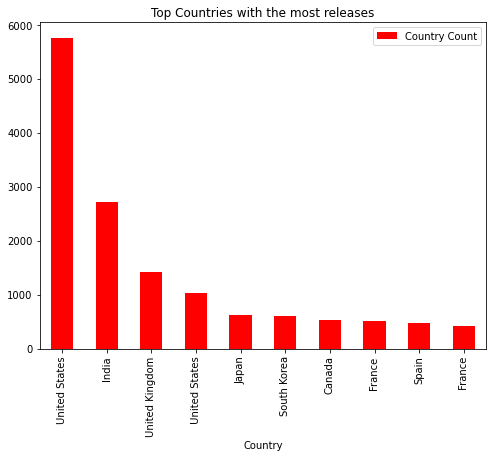

In [843]:
ncountry_df.head(10).plot(
    kind = 'bar',
    color = 'red',
    title = "Top Countries with the most releases",
    figsize = (8, 6))

# plt.savefig('./Images/netflix_countries.png', format = 'png')

In [664]:
# Amazon country releases per year

# Converting string into a list of strings
amazon_data2['country'] = amazon_data2['country'].str.split(',')
amazon_data2

,show_id,title,director,country,release_year,rating,category
0,s1,The Grand Seduction,Don McKellar,[Canada],2014,NaN,Comedy
0,s1,The Grand Seduction,Don McKellar,[Canada],2014,NaN,Drama
1,s2,Take Care Good Night,Girish Joshi,[India],2018,13+,Drama
1,s2,Take Care Good Night,Girish Joshi,[India],2018,13+,International
2,s3,Secrets of Deception,Josh Webber,[United States],2017,NaN,Action
...,...,...,...,...,...,...,...
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,Drama
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,Sports
9667,s9668,Harry Brown,Daniel Barber,NaN,2010,R,Action
9667,s9668,Harry Brown,Daniel Barber,NaN,2010,R,Drama


In [731]:
# explode rows into multiples rows
amazon_data3 = amazon_data2.explode('country')
amazon_data3

,show_id,title,director,country,release_year,rating,category
0,s1,The Grand Seduction,Don McKellar,Canada,2014,NaN,Comedy
0,s1,The Grand Seduction,Don McKellar,Canada,2014,NaN,Drama
1,s2,Take Care Good Night,Girish Joshi,India,2018,13+,Drama
1,s2,Take Care Good Night,Girish Joshi,India,2018,13+,International
2,s3,Secrets of Deception,Josh Webber,United States,2017,NaN,Action
...,...,...,...,...,...,...,...
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,Drama
9666,s9667,Maradona: Blessed Dream,NaN,NaN,2021,TV-MA,Sports
9667,s9668,Harry Brown,Daniel Barber,NaN,2010,R,Action
9667,s9668,Harry Brown,Daniel Barber,NaN,2010,R,Drama


In [851]:
# Amazon country releases per year
acountry_df = pd.DataFrame(amazon_data3["country"].value_counts()).reset_index()
acountry_df.rename(
    columns = {
        'index': 'Country',
        'country': 'Country Count'
    }, inplace = True)

acountry_df

,Country,Country Count
0,United States,566
1,India,538
2,United States,91
3,United Kingdom,90
4,Canada,52
...,...,...
60,Colombia,1
61,Czech Republic,1
62,South Africa,1
63,Monaco,1


In [852]:
# Show list of unique country column items
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(acountry_df['Country'].unique())

['United States' 'India' ' United States' 'United Kingdom' 'Canada'
 ' United Kingdom' ' France' ' India' ' Germany' 'Germany' ' Canada'
 'Spain' 'Italy' ' China' 'France' 'Switzerland' ' Italy' ' Belgium'
 ' Japan' 'Australia' ' Sweden' ' Denmark' 'Japan' 'Brazil' ' Brazil'
 ' Hungary' ' Austria' 'Mexico' 'China' 'Denmark' ' Luxembourg' ' Norway'
 ' Singapore' ' South Korea' ' Spain' ' Mexico' 'Ireland' 'New Zealand'
 ' Hong Kong' 'Chile' 'Netherlands' ' Argentina' 'Austria' 'Kosovo'
 'Poland' ' Thailand' 'Belgium' ' Netherlands' 'Malaysia'
 ' United Arab Emirates' 'Egypt' 'South Africa' ' Portugal' ' Albania'
 ' Switzerland' ' Czech Republic' ' Georgia' 'Iran' ' Kazakhstan'
 ' Ireland' ' Colombia' 'Czech Republic' ' South Africa' ' Monaco'
 'Afghanistan']


In [853]:
# Rename countries
acountry_df['Country'] = acountry_df['Country'].replace({
    ' United States': 'United States',
    ' United Kingdom': 'United Kingdom',
    ' France': 'France',
    ' India': 'India', 
    ' Germany': 'Germany',
    ' Canada': 'Canada',
    ' China': 'China',
    ' Italy': 'Italy',
    ' Belgium': 'Belgium',
    ' Japan': 'Japan', 
    ' Sweden': 'Sweden',
    ' Denmark': 'Denmark',
    ' Brazil': 'Brazil',
    ' Hungary': 'Hungary',
    ' Austria': 'Austria',
    ' Luxembourg': 'Luxembourg',
    ' Norway': 'Norway',
    ' Singapore': 'Singapore', 
    ' South Korea': 'South Korea', 
    ' Spain': 'Spain', 
    ' Mexico': 'Mexico', 
    ' Hong Kong': 'Hong Kong',
    ' Argentina': 'Argentina',
    ' Thailand': 'Thailand',
    ' Netherlands': 'Netherlands',
    ' United Arab Emirates': 'United Arab Emirates',
    ' Portugal': 'Portugal', 
    ' Albania': 'Albania',
    ' Switzerland': 'Switzerland', 
    ' Czech Republic': 'Czech Republic', 
    ' Georgia': 'Georgia', 
    ' Kazakhstan': 'Kazakhstan',
    ' Ireland': 'Ireland', 
    ' Colombia': 'Colombia',
    ' South Africa': 'South Africa', 
    ' Monaco': 'Monaco'
    })
acountry_df

,Country,Country Count
0,United States,566
1,India,538
2,United States,91
3,United Kingdom,90
4,Canada,52
...,...,...
60,Colombia,1
61,Czech Republic,1
62,South Africa,1
63,Monaco,1


In [854]:
# Combining same countries together, total country count, sort descending
acountry_df = acountry_df.groupby(['Country']).sum().sort_values(
        by = 'Country Count', 
        ascending = False
        )
acountry_df

,Country Count
Country,
United States,657
India,560
United Kingdom,129
Canada,71
France,40
Germany,38
Italy,24
Spain,20
China,17


In [855]:
# top 10 countries
# acountry_df = acountry_df.loc[acountry_df["Country Count"] > 50, :]
acountry_df.head(10)

,Country Count
Country,
United States,657
India,560
United Kingdom,129
Canada,71
France,40
Germany,38
Italy,24
Spain,20
China,17


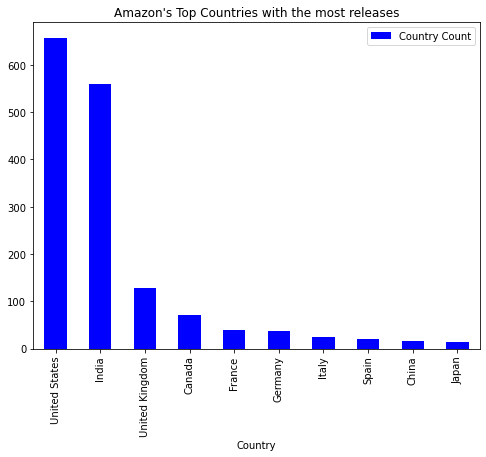

In [856]:
# plot top 10 countries
acountry_df.head(10).plot(
    kind='bar',
    color = 'blue',
    title = "Amazon's Top Countries with the most releases",
    figsize = (8, 6))

plt.show()
# plt.savefig('./Images/amazon_countries.png', format = 'png')

In [818]:
countries_df = pd.merge(
    ncountry_df,
    acountry_df, 
    on = 'Country', 
    how = 'outer').fillna(0) #fill NaN with 0

countries_df.rename(
    columns = {
        'Country Count_x': 'Netflix Count',
        'Country Count_y': 'Amazon Count'
    }, inplace = True)

countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        202 non-null    object 
 1   Netflix Count  202 non-null    float64
 2   Amazon Count   202 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.3+ KB


In [822]:
# Change dtype of count columns to integer
countries_df = countries_df.astype({
    'Netflix Count': 'int64',
    'Amazon Count': 'int64'
    }).set_index('Country')

countries_df.info()
countries_df

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, United States to Afghanistan
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Netflix Count  202 non-null    int64
 1   Amazon Count   202 non-null    int64
dtypes: int64(2)
memory usage: 4.7+ KB


,Netflix Count,Amazon Count
Country,,
United States,5755,657
India,2721,560
United Kingdom,1413,129
United States,1025,0
Japan,619,14
...,...,...
Kosovo,0,2
Monaco,0,1
Albania,0,1


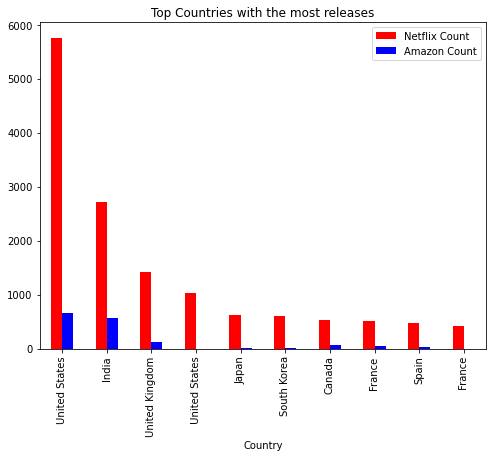

In [857]:
countries_df.head(10).plot(
    kind = 'bar',
    color = ('red', 'blue'),
    title = "Top Countries with the most releases",
    figsize = (8, 6))

plt.show()
# plt.savefig('./Images/countries.png', format = 'png')